In [1]:
import os
os.chdir('../../..')

In [2]:
import convokit

In [3]:
from convokit import Corpus
import pickle
import numpy as np
import os
from tensorly.decomposition import parafac
from convokit.tensors.utils import plot_factors
from sklearn.preprocessing import StandardScaler
from collections import defaultdict, Counter
from jinja2 import Environment, FileSystemLoader
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [4]:
from convokit import TensorDecomposer

In [5]:
# CORPUS_DIR = "convokit/tensor_decomposer/experiments/reddit-trajectory-subset-annotated"
CORPUS_DIR = "convokit/thread_generator/annotated-fake-trajectory-4"

In [6]:
import numpy as np
def _min_max_scale(mat):
    max_ = np.max(mat)
    min_ = np.min(mat)
    return (mat - min_) / (max_ - min_)

def minmax_normalize(tensor):
    tensor = tensor.copy()
    for i in range(tensor.shape[2]):
        tensor[:, :, i] = _min_max_scale(tensor[:, :, i])
    return tensor

In [7]:
hyperconv_range = range(2, 20+1)
td_min_max = TensorDecomposer(obj_type="conversation",
                      feature_set=["hyperconvo-{}".format(i) for i in range(2, 21)],
                      group_func=lambda convo: convo.get_utterance(convo.id).meta['subreddit'],
#                       normalize_func=minmax_normalize,
                      rank=3
                     )

In [8]:
corpus = Corpus(CORPUS_DIR)

In [9]:
td_min_max.fit(corpus)

Constructing tensor...Done.
Decomposing tensor...Done.


In [10]:
td_min_max.factors[1].shape

(4500, 3)

In [11]:
corpus.random_speaker().__dict__.keys()

dict_keys(['obj_type', '_owner', 'meta', '_id', 'utterances', 'conversations'])

In [12]:
df = corpus.view_conversations()

In [13]:
from sklearn.preprocessing import Imputer, Normalizer, StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import pairwise_distances

In [14]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=2000, verbose=1)

In [15]:
print(td_min_max.factors[1].shape)
projected_threads = tsne.fit_transform(td_min_max.factors[1])
print(projected_threads.shape)

xs = [x for (x, y) in projected_threads]
ys = [y for (x, y) in projected_threads]

df['x'] = xs
df['y'] = ys

(4500, 3)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4500 samples in 0.001s...
[t-SNE] Computed neighbors for 4500 samples in 0.066s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4500
[t-SNE] Computed conditional probabilities for sample 2000 / 4500
[t-SNE] Computed conditional probabilities for sample 3000 / 4500
[t-SNE] Computed conditional probabilities for sample 4000 / 4500
[t-SNE] Computed conditional probabilities for sample 4500 / 4500
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.778393
[t-SNE] KL divergence after 1000 iterations: 0.566603
(4500, 2)


In [16]:
import seaborn as sns

In [17]:
df['meta.percentile'] = df['meta.percentile'].astype('float64')

In [18]:
max(df['meta.percentile'])

1.0

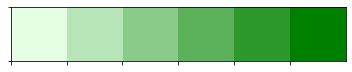

In [19]:
sns.palplot(sns.light_palette("green"))

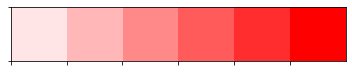

In [20]:
sns.palplot(sns.light_palette("red"))

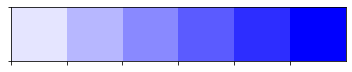

In [21]:
sns.palplot(sns.light_palette("blue"))

In [22]:
import matplotlib.pyplot as plt

In [23]:
import random

In [24]:
for convo in corpus.iter_conversations():
    for idx, utt in enumerate(convo.get_chronological_utterance_list()):
        utt.meta['order'] = idx

In [25]:
convo_ids = [convo.id for convo in corpus.iter_conversations()]

In [26]:
corpus.random_utterance().meta

{'prob': 0.7424245917321737,
 'subreddit': '1.focused->expansionary',
 'order': 17}

In [27]:
for convo in corpus.iter_conversations():
    convo.meta['group'] = next(convo.iter_utterances()).meta['subreddit']

In [28]:
import seaborn as sns

In [29]:
tips = sns.load_dataset("tips")

In [30]:
corpus.random_utterance()

Utterance({'obj_type': 'utterance', '_owner': <convokit.model.corpus.Corpus object at 0x1282d17d0>, 'meta': {'prob': 0.9, 'subreddit': '2.expansionary->focused', 'order': 13}, '_id': '2292-14', 'speaker': Speaker({'obj_type': 'speaker', '_owner': <convokit.model.corpus.Corpus object at 0x1282d17d0>, 'meta': {}, '_id': '0x26'}), 'conversation_id': '2292-1', '_root': '2292-1', 'reply_to': '2292-13', 'timestamp': 14, 'text': None})

In [31]:
len(sns.light_palette('green'))

6

In [32]:
colors = { 
    1: sns.light_palette('green'),
    2: sns.light_palette('blue'),
    3: sns.light_palette('red')
}

In [33]:
df.head()

,meta.group,meta.hyperconvo-10,meta.hyperconvo-11,meta.hyperconvo-12,meta.hyperconvo-13,meta.hyperconvo-14,meta.hyperconvo-15,meta.hyperconvo-16,meta.hyperconvo-17,meta.hyperconvo-18,...,meta.hyperconvo-4,meta.hyperconvo-5,meta.hyperconvo-6,meta.hyperconvo-7,meta.hyperconvo-8,meta.hyperconvo-9,meta.percentile,meta.prob,x,y
id,,,,,,,,,,,,,,,,,,,,,
1-1,1,"{'max[indegree over c->c responses]': 3, 'argm...","{'max[indegree over c->c responses]': 4, 'argm...","{'max[indegree over c->c responses]': 5, 'argm...","{'max[indegree over c->c responses]': 6, 'argm...","{'max[indegree over c->c responses]': 7, 'argm...","{'max[indegree over c->c responses]': 8, 'argm...","{'max[indegree over c->c responses]': 8, 'argm...","{'max[indegree over c->c responses]': 9, 'argm...","{'max[indegree over c->c responses]': 10, 'arg...",...,"{'max[indegree over c->c responses]': 1, 'argm...","{'max[indegree over c->c responses]': 1, 'argm...","{'max[indegree over c->c responses]': 1, 'argm...","{'max[indegree over c->c responses]': 1, 'argm...","{'max[indegree over c->c responses]': 1, 'argm...","{'max[indegree over c->c responses]': 2, 'argm...",0.120842,3.65057e-06,-25.119751,77.052681
2-1,1,"{'max[indegree over c->c responses]': 1, 'argm...","{'max[indegree over c->c responses]': 2, 'argm...","{'max[indegree over c->c responses]': 2, 'argm...","{'max[indegree over c->c responses]': 3, 'argm...","{'max[indegree over c->c responses]': 4, 'argm...","{'max[indegree over c->c responses]': 5, 'argm...","{'max[indegree over c->c responses]': 6, 'argm...","{'max[indegree over c->c responses]': 7, 'argm...","{'max[indegree over c->c responses]': 8, 'argm...",...,"{'max[indegree over c->c responses]': 1, 'argm...","{'max[indegree over c->c responses]': 1, 'argm...","{'max[indegree over c->c responses]': 1, 'argm...","{'max[indegree over c->c responses]': 1, 'argm...","{'max[indegree over c->c responses]': 1, 'argm...","{'max[indegree over c->c responses]': 1, 'argm...",0.882422,0.00373759,34.400146,52.652473
3-1,1,"{'max[indegree over c->c responses]': 3, 'argm...","{'max[indegree over c->c responses]': 4, 'argm...","{'max[indegree over c->c responses]': 5, 'argm...","{'max[indegree over c->c responses]': 6, 'argm...","{'max[indegree over c->c responses]': 7, 'argm...","{'max[indegree over c->c responses]': 7, 'argm...","{'max[indegree over c->c responses]': 8, 'argm...","{'max[indegree over c->c responses]': 9, 'argm...","{'max[indegree over c->c responses]': 10, 'arg...",...,"{'max[indegree over c->c responses]': 1, 'argm...","{'max[indegree over c->c responses]': 2, 'argm...","{'max[indegree over c->c responses]': 2, 'argm...","{'max[indegree over c->c responses]': 3, 'argm...","{'max[indegree over c->c responses]': 3, 'argm...","{'max[indegree over c->c responses]': 3, 'argm...",0.259567,2.09562e-05,-21.122080,72.464455
4-1,1,"{'max[indegree over c->c responses]': 1, 'argm...","{'max[indegree over c->c responses]': 2, 'argm...","{'max[indegree over c->c responses]': 2, 'argm...","{'max[indegree over c->c responses]': 3, 'argm...","{'max[indegree over c->c responses]': 4, 'argm...","{'max[indegree over c->c responses]': 5, 'argm...","{'max[indegree over c->c responses]': 6, 'argm...","{'max[indegree over c->c responses]': 7, 'argm...","{'max[indegree over c->c responses]': 8, 'argm...",...,"{'max[indegree over c->c responses]': 1, 'argm...","{'max[indegree over c->c responses]': 1, 'argm...","{'max[indegree over c->c responses]': 1, 'argm...","{'max[indegree over c->c responses]': 1, 'argm...","{'max[indegree over c->c responses]': 1, 'argm...","{'max[indegree over c->c responses]': 1, 'argm...",0.882422,0.00373759,34.400440,52.652153
5-1,1,"{'max[indegree over c->c responses]': 2, 'argm...","{'max[indegree over c->c responses]': 3, 'argm...","{'max[indegree over c->c responses]': 4, 'argm...","{'max[indegree over c->c responses]': 5, 'argm...","{'max[indegree over c->c responses]': 6, 'argm...","{'max[indegree over c->c responses]': 7, 'argm...","{'max[in

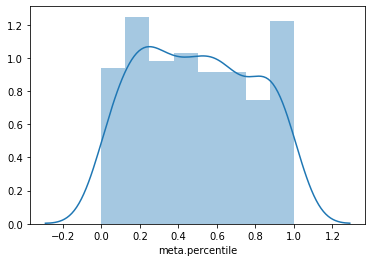

In [34]:
sns.distplot(df[:333]['meta.percentile'])

In [35]:
get_desc = {
    1: '1.focused->expansionary',
    2: '2.expansionary->focused',
    3: '3.dyadic chain'
}

In [36]:
from matplotlib.patches import Patch


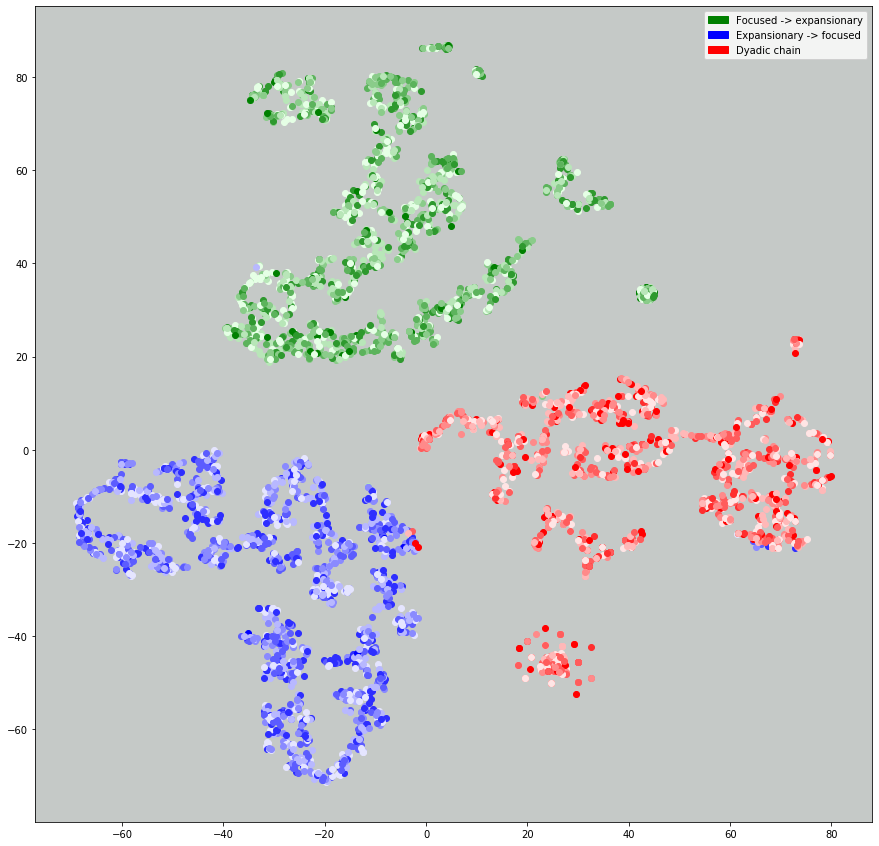

In [79]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot()


ax.set_facecolor('xkcd:silver')

for idx in range(td_min_max.factors[1].shape[0]):
    r = df.iloc[idx]
    ax.scatter(r['x'], r['y'], c=colors[r['meta.group']][int(5*r['meta.percentile'])].reshape(1, -1))
# for i in range(td_min_max.factors[1].shape[0]):
#     if random.random() < 0.1:
#         ax.(corpus.get_conversation(convo_ids[i]).meta['group'], (projected_threads[i][0], projected_threads[i][1]))
legend_elements = [Patch(facecolor='Green', edgecolor='g', label='Focused -> expansionary'),
                   Patch(facecolor='Blue', edgecolor='b', label='Expansionary -> focused'),
                   Patch(facecolor='Red', edgecolor='r', label='Dyadic chain')
                  ]

# Create the figure
ax.legend(handles=legend_elements)
plt.show()

In [38]:
os.chdir('convokit/tensor_decomposer')

In [80]:
fig.savefig('TSNE_big_fake_TCA.png')

### tracing the reverse C curve

In [39]:
# in the ball
# corpus.get_conversation('768-1').print_conversation_structure(lambda utt: str(utt.meta['order'] + 1) + ". " + utt.speaker.id)

## What if we focus further specifically on the positive / negative threads only?

Since these might be most striking and therefore give us a more separated TSNE.

In [40]:
# from collections import defaultdict, Counter

In [41]:
# anomaly_threshold = 1.5

In [42]:
# def get_anomalous_points(factor_full, idx):
#     scaler = StandardScaler()
#     factor = factor_full[:, idx]
#     reshaped = factor.reshape((factor.shape[0], 1))
#     scaled = scaler.fit_transform(reshaped)
#     pos_pts = np.argwhere(scaled.reshape(factor.shape[0]) > anomaly_threshold).flatten()
#     neg_pts = np.argwhere(scaled.reshape(factor.shape[0]) < -anomaly_threshold).flatten()
#     return pos_pts, neg_pts

# def generate_high_level_summary():
#     # generate_plots()
#     with open(os.path.join(DATA_DIR, 'rank_to_factors.p'), 'rb') as f:
#         rank_to_factors = pickle.load(f)

#     with open(os.path.join(DATA_DIR, 'hg_features.p'), 'rb') as f:
#         liwc_features = pickle.load(f)

#     with open(os.path.join(DATA_DIR, 'subreddits.p'), 'rb') as f:
#         subreddits = pickle.load(f)

#     time_factor = rank_to_factors[max_rank][0] # (9, 9)
#     thread_factor = rank_to_factors[max_rank][1] # (10000, 9)
#     feature_factor = rank_to_factors[max_rank][2] # (140, 9)
#     idx_to_distinctive_threads = defaultdict(dict)
#     idx_to_distinctive_features = defaultdict(dict)

#     # normalizing
#     subreddit_totals = Counter(subreddits)
#     for idx in range(max_rank):
#         pos_thread_pts, neg_thread_pts = get_anomalous_points(thread_factor, idx)
#         idx_to_distinctive_threads[idx]['pos_threads'] = pos_thread_pts
#         idx_to_distinctive_threads[idx]['neg_threads'] = neg_thread_pts

#         pos_features, neg_features = get_anomalous_points(feature_factor, idx)
#         idx_to_distinctive_features[idx]['pos_features'] = pos_features
#         idx_to_distinctive_features[idx]['neg_features'] = neg_features

#     return idx_to_distinctive_threads, idx_to_distinctive_features 

In [43]:
# idx_to_distinctive_threads, idx_to_distinctive_features = generate_high_level_summary()

In [44]:
# for factor_idx, threads in idx_to_distinctive_threads.items():
#     print("Factor {}".format(factor_idx+1))
#     print("Number of pos threads: {}".format(len(threads['pos_threads'])))
#     print("Number of neg threads: {}".format(len(threads['neg_threads'])))
#     print("Positive feats: {}".format(idx_to_distinctive_features[factor_idx]['pos_features']))
#     print("Negative feats: {}".format(idx_to_distinctive_features[factor_idx]['neg_features']))
#     print()

In [45]:
# included_threads = set()

# for factor_idx, threads in idx_to_distinctive_threads.items():
#     included_threads = included_threads.union(set(threads['pos_threads'])).union(threads['neg_threads'])

In [46]:
# len(included_threads)

In [47]:
# included_threads = sorted(included_threads)

In [48]:
# factors[1][included_threads].shape

In [49]:
# projected_threads = tsne.fit_transform(factors[1][included_threads])
# print(projected_threads.shape)

In [50]:
# plt.figure(figsize=(15,15))
# plt.scatter(projected_threads[:,0], projected_threads[:, 1])

# for i in range(len(included_threads)):
#     if random.random() < 0.7:
#         plt.annotate(corpus.get_utterance(convo_ids[included_threads[i]]).meta['subreddit'][0], (projected_threads[i][0], projected_threads[i][1]))
    
# plt.show()

## What if we did it with static hyperconvo features?

In [51]:
import pandas as pd

In [52]:
threads_feats = dict()

for convo in corpus.iter_conversations():
    threads_feats[convo.id] = convo.meta['hyperconvo-20']
    
def clean_value(x):
    if np.isinf(x) or np.isnan(x):
        return -1
    return x

In [53]:
feat_names = list(next(iter(threads_feats.values())).keys())

In [54]:
thread_ids = []
feats = []
for key, feat_dict in threads_feats.items():
    thread_ids.append(key)
    feats.append([clean_value(feat_dict[k]) for k in feat_names])

In [55]:
feat_df = pd.DataFrame(data=feats, index=thread_ids, columns=feat_names)

In [56]:
from sklearn.impute import SimpleImputer

In [57]:
feat_mtx = SimpleImputer(missing_values=-1).fit_transform(feat_df.values)
feat_mtx = StandardScaler().fit_transform(feat_mtx)

In [58]:
svd = TruncatedSVD(n_components=3, algorithm='arpack') # deals with an issue where the randomized alg hangs
svd.fit(feat_mtx)
U, s, V = svd.transform(feat_mtx) / svd.singular_values_, \
        svd.singular_values_, \
        svd.components_.T

In [59]:
U_norm = Normalizer().fit_transform(U)
V_norm = Normalizer().fit_transform(V)
U_df = pd.DataFrame(data=U_norm, index=feat_df.index)
V_df = pd.DataFrame(data=V_norm, index=feat_names)

In [60]:
tsne_hc = TSNE(random_state=2018)
tsne_hc_df = pd.DataFrame(data=tsne_hc.fit_transform(feat_df.values),
                      index=feat_df.index)

In [61]:
len(tsne_hc_df)

4500

In [62]:
U_df.shape

(4500, 3)

In [72]:
projected_threads = tsne_hc.fit_transform(U_df)
print(projected_threads.shape)

xs = [x for (x, y) in projected_threads]
ys = [y for (x, y) in projected_threads]

tsne_hc_df['x'] = xs
tsne_hc_df['y'] = ys

(4500, 2)


In [64]:
tsne_hc_df['meta.group'] = df['meta.group']
tsne_hc_df['meta.percentile'] = df['meta.percentile']

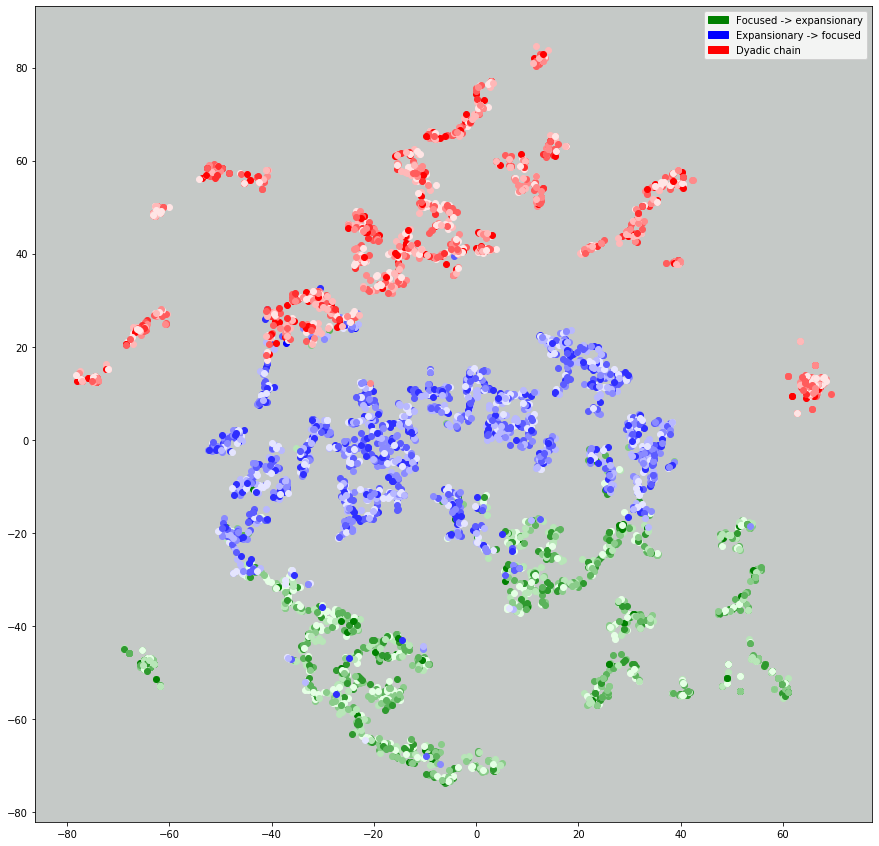

In [76]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot()
ax.set_facecolor('xkcd:silver')

for idx in range(len(tsne_hc_df)):
    r = tsne_hc_df.iloc[idx]
    ax.scatter(r['x'], r['y'], c=colors[r['meta.group']][int(5*r['meta.percentile'])].reshape(1, -1))
# for i in range(td_min_max.factors[1].shape[0]):
#     if random.random() < 0.1:
#         ax.(corpus.get_conversation(convo_ids[i]).meta['group'], (projected_threads[i][0], projected_threads[i][1]))
legend_elements = [Patch(facecolor='Green', edgecolor='g', label='Focused -> expansionary'),
                   Patch(facecolor='Blue', edgecolor='b', label='Expansionary -> focused'),
                   Patch(facecolor='Red', edgecolor='r', label='Dyadic chain')
                  ]
# Create the figure
ax.legend(handles=legend_elements)
plt.show()

In [78]:
fig.savefig('TSNE_big_fake_hyperconvo.png')

In [73]:
tsne_hc_df

,0,1,x,y,meta.group,meta.percentile
1-1,6.381609,-77.622940,29.802069,-37.367447,1,0.120842
2-1,26.759199,-28.236801,51.561100,-54.009949,1,0.882422
3-1,-14.596165,-77.788986,7.313962,-35.363792,1,0.259567
4-1,26.776678,-28.231091,51.561951,-54.012192,1,0.882422
5-1,28.834948,-51.073750,10.146459,-35.655315,1,0.614912
6-1,31.596544,-37.401829,3.314392,-70.966019,1,0.950085
7-1,9.074161,-18.904621,-32.136578,-40.585060,1,0.233374
8-1,-11.025965,-51.604507,8.481216,-22.187243,1,0.252927
9-1,-13.874705,-78.290703,27.826679,-34.852325,1,0.245407
10-1,-8.041924,-24.536619,25.997494,-21.366709,1,0.403526


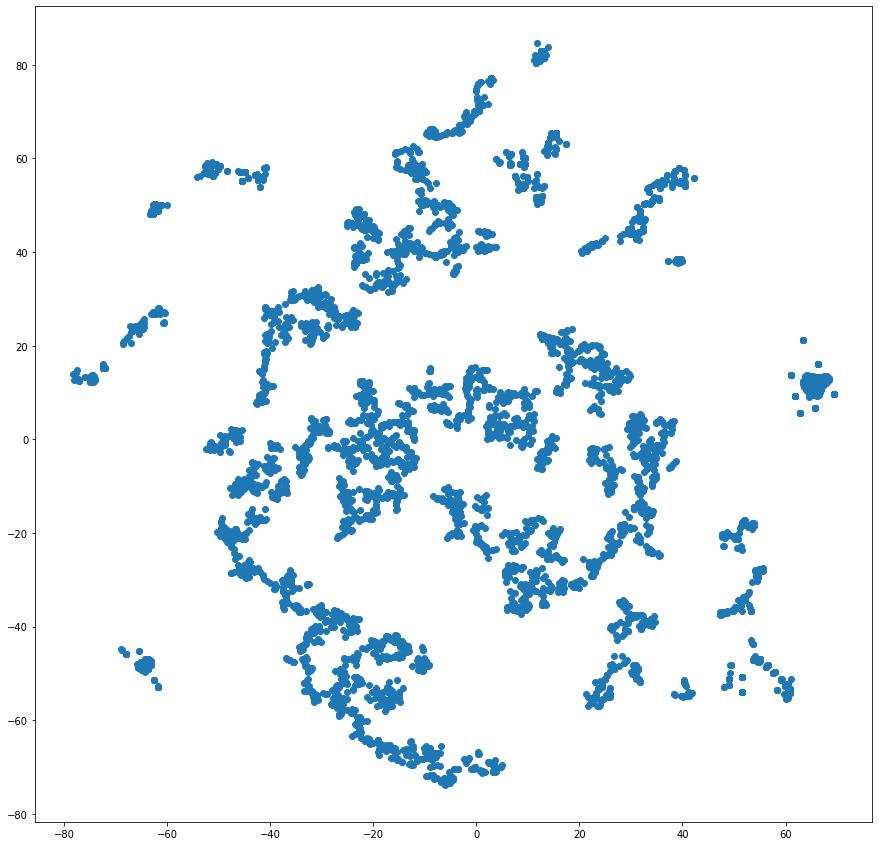

In [75]:
plt.figure(figsize=(15,15))
plt.scatter(tsne_hc_df['x'].values, tsne_hc_df['y'].values)
# for i, txt in enumerate(tsne_hc_df.index):
#     if random.random() < 0.5:
#         plt.annotate(corpus.get_utterance(txt).meta['subreddit'][0], (tsne_hc_df.values[i,0], tsne_hc_df.values[i,1]))
plt.show()